In [ ]:
#Homework 2
#Goal: Build and evaluate Regression Model that predicts 

In [ ]:
#Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
#Loading Heart File 

In [3]:
heart = pd.read_csv('heart.csv') 
heart.head()
heart.info()
heart.describe()
heart.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#Data exploration 
# Here I want to understand data structure and characteristics 
#I want to analyze data quality before preprocessing 

# My observations
# The target whether a patient  has heart disease 1 =yes and 0 = no
#Most columns int and float
#Dataset have 1025 rows and 14 columns
#No missing values 
# No null values 

In [ ]:
#Data Exploration 

<Axes: >

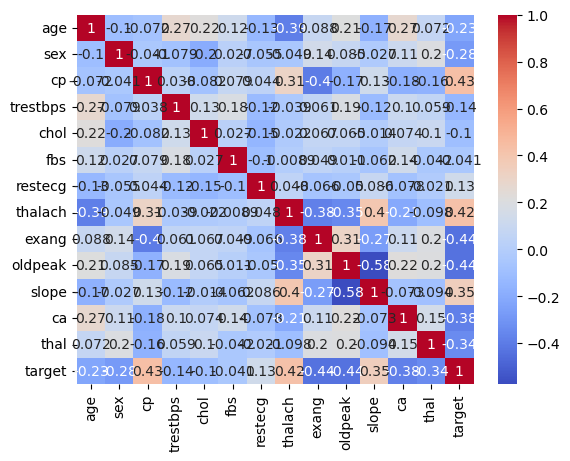

In [4]:
sns.countplot(x='target', data=df)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [ ]:
#Looking at this heatmap
#Most features show weak to moderate correlations (|r| < 0.4).  
#Positively related to heart disease: chest pain(cp), thal`.  
#Negatively related: `oldpeak`, `exang`, `ca`.  
#These patterns make sense — heart disease is linked with chest pain, lower exercise tolerance, and ST depression.

In [5]:
#Handle missing Values 
heart.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#No missing values 

In [6]:
#Data Preprocessing 
X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# We split data into training and testing to evaluate how well the model performs on unseen data 
#Helps with overfitting and I want to ensure that model can generalize to new patients 


In [11]:
#Model - Logistic regression 
heart_model = LogisticRegression(max_iter=1000)
heart_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
#We use it for binary classification problems 


In [12]:
#Evaluation 
y_pred = heart_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7951219512195122
Confusion Matrix:
 [[73 29]
 [13 90]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



In [ ]:
#Evaluation
#Accuracy 79.5%
# The model achieved ~79.5% accuracy, meaning it correctly predicted heart disease in about 8 out of 10 patients.
#This is strong performance
#Confusion Metric Interpretation 
# [[73 29]     #the model is better at detecting true heart disease cases than avoiding false alarms — which is good for medical screening (better to flag potential risk than to miss real cases).
# [13 90]]


In [ ]:
###Conclusions
# My Logistic Regression model achieved about 80% accuracy   
#Most influential features were chest pain type, max heart rate, oldpeak, and exercise-induced angina  
#The model can help predict potential heart disease cases early, though future versions could test Decision Tree or Random Forest for comparison.


In [ ]:
### My Recommendation to Doctors and Healthcare Providers

#This Logistic Regression model can assist doctors in identifying patients at higher risk of heart disease based on key health indicators such as age, chest pain type, cholesterol, and heart rate.  

#However, it should be used as a supporting tool, not a replacement for medical diagnosis.  
#Doctors can use the model’s predictions to:
#Prioritize patients for further testing or lifestyle counseling.  
#Identify early warning signs and intervene before serious complications arise.  
#Combine model results with clinical judgment and additional tests (like ECG, or blood panels).

#Continuous retraining with new patient data is recommended to keep the model accurate and aligned with real-world medical patterns.
